In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pickle
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from geopack import geopack
import pyspedas
import sys
import pandas as pd
import seaborn as sns
import xarray as xr

sys.path.append('/Users/sr2/opt/anaconda3/envs/nipr_env/')
from esn_dts_openloop import ESN, Tikhonov

Load IGRF coefficients ...


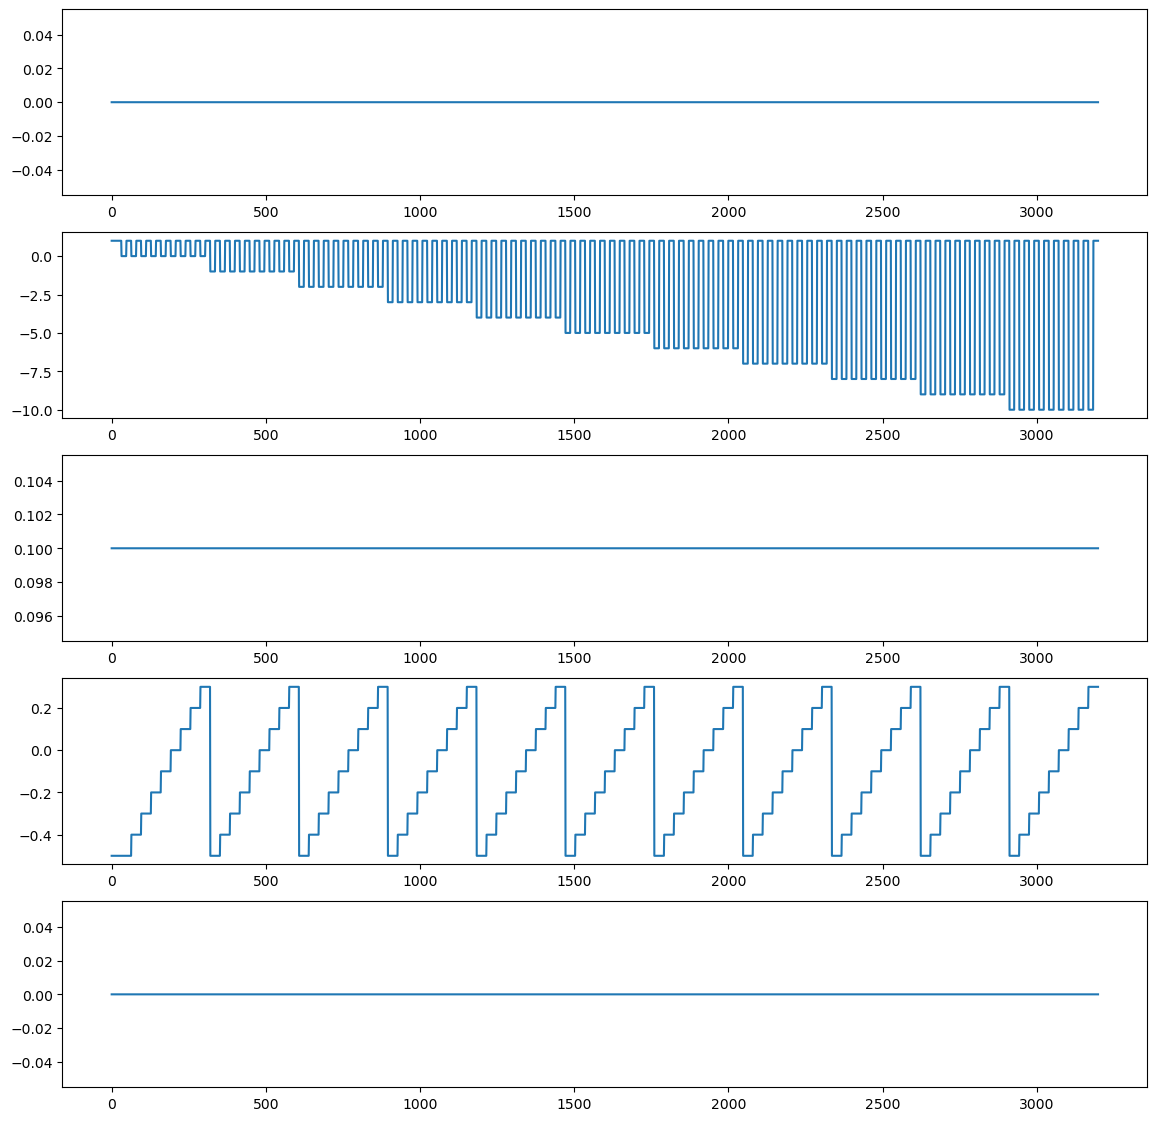

In [4]:
#import numpy as np
#import matplotlib.pyplot as plt
#import datetime
#import pyspedas
#from geopack import geopack
#from pytplot import tplot
#from pytplot import get_data
#import pandas as pd


# #omni_vars = pyspedas.omni.data(trange=['2013-11-5', '2013-11-6'])
# omni_vars = pyspedas.omni.data(trange=['2015-2-5', '2015-2-8'])

# byo=get_data( 'BY_GSM')
# bzo=get_data( 'BZ_GSM')
# vvo=get_data( 'flow_speed')
# nno=get_data( 'proton_density')

# alo=get_data( 'AL_INDEX')
# auo=get_data( 'AU_INDEX')
# alp=pd.DataFrame(alo.y)
# aup=pd.DataFrame(auo.y)

# tto=byo.times
# tlt2=np.zeros(tto.shape[0])

# for ii in range(0,tto.shape[0]):

#    mn=60.0*(hh[ii]-int(hh[ii]))
#    t0 = datetime.datetime(int(yy[ii]),int(mm[ii]),int(dd[ii]),int(hh[ii]),int(mn),0)
#    ut = (t1-t0).total_seconds()
#     ut = tto[ii]
#     ps = geopack.recalc(ut)
#     tlt2[ii]=ps/90.0

# byp=pd.DataFrame(byo.y)
# byp2=byp.fillna(method="ffill")

# bzp=pd.DataFrame(bzo.y)
# bzp2=bzp.fillna(method="ffill")

# vvp=pd.DataFrame(vvo.y)
# vvp2=vvp.fillna(method="ffill")

# vvp2=np.log10(vvp2)-2.5

# nnp=pd.DataFrame(nno.y)
# nnp2=nnp.fillna(method="ffill")

# nnp2=np.log10(nnp2)-1.0

# tilt=np.zeros(200)-35
# for i in  range(0,15):
#     tilt0=np.zeros(200)-35+i*5
#     tilt=np.append(tilt,tilt0)

#tlt2=tilt/180.*3.14/90.0

tl=np.zeros(32)
nn=np.zeros(32)-0.5
vv=np.zeros(32)+0.1
by=np.zeros(32)
bz=np.zeros(32)+1
for i in  range(0,11):
    for j in  range(0,9):
        

        bz0=np.zeros(16)-i
        bz1=np.zeros(16)+1
        bz=np.append(bz,bz0)
        bz=np.append(bz,bz1)

        vv0=np.zeros(32)+0.1
        vv=np.append(vv,vv0)

        tl0=np.zeros(32)
        tl=np.append(tl,tl0)

        nn0=np.zeros(32)-0.5+j*0.1
        nn=np.append(nn,nn0)

        by0=np.zeros(32)
        by=np.append(by,by0)

# tlt2=np.zeros(40*16)
# #vvp2=np.zeros(200*16)+0.1
# vvp2=np.zeros(40*16)+0.3
# byp2=np.zeros(40*16)+5
# byp2=np.zeros(40*16)
# byp2=np.zeros(40*16)-10
# #bzp2=np.zeros(200*16)-5
# bzp2=bz
# nnp2=np.zeros(40*16)-0.3
# #nnp2=np.zeros(200*16)

bzp2=bz
byp2=by
nnp2=nn
vvp2=vv
tlt2=tl

fig = plt.figure(figsize=(14, 14))
    
ax1 = fig.add_subplot(511)
ax1.plot(byp2)

ax2 = fig.add_subplot(512)
ax2.plot(bzp2)
    
ax3 = fig.add_subplot(513)
ax3.plot(vvp2)

ax4 = fig.add_subplot(514)
ax4.plot(nnp2)

ax5 = fig.add_subplot(515)
ax5.plot(tlt2)


In [3]:
import pickle

#sw10,sw20,sw30,sw40 = read_sw_data(file_name='synth02clock1min.txt')
all10 = np.vstack((tlt2,byp2.T,bzp2.T,vvp2.T,nnp2.T))
#all10 = np.vstack((-sw10,sw20,sw30,sw40))#south By switch
data_s = all10.T

#flearn=1e-3 #for sigma
flearn=1e-6 #for pot and fac
modelp = pickle.load(open('modelp099_250.sav','rb'))
test_Y = modelp.predict(data_s)
pcap = test_Y/flearn

fig = plt.figure(figsize=(14, 14))
    
ax1 = fig.add_subplot(611)
ax1.plot(data_s[:,1]/10, label='By/10')
ax1.plot(data_s[:,2]/10, label='Bz/10')
ax1.plot(data_s[:,3], label='log10(Vsw)-2.5')
ax1.plot(data_s[:,4], label='log10(Np)-1.0')
ax1.legend()

ax2 = fig.add_subplot(612)
ax2.plot(test_Y[:,0], label='pca1 esn')
ax2.legend()

ax3 = fig.add_subplot(613)
ax3.plot(test_Y[:,1], label='pca2 esn')
ax3.legend()

ax4 = fig.add_subplot(614)
ax4.plot(test_Y[:,2], label='pca3 esn')
ax4.legend()

ax5 = fig.add_subplot(615)
ax5.plot(test_Y[:,3], label='pca4 esn')
ax5.legend()

ax6 = fig.add_subplot(616)
ax6.plot(test_Y[:,4], label='pca5 esn')
ax6.legend()

plt.show()

NameError: name 'tlt2' is not defined

In [ ]:
flearn=1e-3 #for sigma
#flearn=1e-6 #for pot and fac

modelw = pickle.load(open('modelw099_300.sav','rb'))
test_Y = modelw.predict(data_s)
pcaw=test_Y/flearn

fig = plt.figure(figsize=(14, 14))
    
ax1 = fig.add_subplot(611)
ax1.plot(data_s[:,1]/10, label='By/10')
ax1.plot(data_s[:,2]/10, label='Bz/10')
ax1.plot(data_s[:,3], label='log10(Vsw)-2.5')
ax1.plot(data_s[:,4], label='log10(Np)-1.0')
ax1.legend()

ax2 = fig.add_subplot(612)
ax2.plot(test_Y[:,0], label='pca1 esn')
ax2.legend()

ax3 = fig.add_subplot(613)
ax3.plot(test_Y[:,1], label='pca2 esn')
ax3.legend()

ax4 = fig.add_subplot(614)
ax4.plot(test_Y[:,2], label='pca3 esn')
ax4.legend()

ax5 = fig.add_subplot(615)
ax5.plot(test_Y[:,3], label='pca4 esn')
ax5.legend()

ax6 = fig.add_subplot(616)
ax6.plot(test_Y[:,4], label='pca5 esn')
ax6.legend()

plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#p=np.load('p.npy')
#xy=np.load('xy.npy')

meanw=np.load('meanw.npy')
imgpcaw=np.load('imgw.npy')
#datpcaw=np.load('pcaw.npy')

datpcaw=pcaw

#meanw,imgpcaw,datpcaw = np.load('meanw.npy','imgw.npy','pcaw.npy')

#xy=np.dot(imgpcaw,datpcaw)+meanw
xy=np.dot(datpcaw,imgpcaw)+meanw

meanp=np.load('meanp.npy')
imgpcap=np.load('imgp.npy')
#datpcap=np.load('pcap.npy')

datpcap=pcap

p=np.dot(datpcap,imgpcap)+meanp

#cc=cc3[iii,:]

#cc2=cc.reshape(30,80)
#bb2=np.mean(b,axis=0)
#bb2=bb2.reshape(30,80)
#cc2=cc2+bb2
#plt.figure(figsize=(15,15))
##plt.imshow(cc.reshape(30,80), cmap='gray')
#plt.imshow(cc2, cmap='gray')
#np.max(cc)

#p0=p[0,:]
#p1=p0.reshape(30,80)

fig = plt.figure(figsize=(14, 14))

theta=np.array([ 0.0, 11.25, 22.5, 33.75, 45.0, 56.25, 67.5, 78.75,
       90.0, 101.25, 112.5, 123.75, 135.0, 146.25, 157.5, 168.75, 
       180.0, 191.25, 202.5, 213.75, 225.0, 236.25, 247.5, 258.75, 
       270.0, 281.25, 292.5, 303.75, 315.0, 326.25, 337.5, 348.75, 360.0])

#normal grid lon
theta=np.array([  1.688 ,   6.188 ,  10.688 ,  15.188 ,  19.688 ,  24.188 ,  28.688 ,  33.188 ,  37.688 ,  42.188,
                46.688 ,  51.188 ,  55.688 ,  60.188 ,  64.688 ,  69.188 ,  73.688 ,  78.188 ,  82.688 ,  87.188,
                91.688 ,  96.188 , 100.688 , 105.188 , 109.688 , 114.188 , 118.688 , 123.188 , 127.688 , 132.188,
                136.688 , 141.188 , 145.687 , 150.188 , 154.688 , 159.188 , 163.688 , 168.187 , 172.687 , 177.187,
                181.687 , 186.187 , 190.687 , 195.187 , 199.687 , 204.187 , 208.687 , 213.187 , 217.687 , 222.187,
                226.687 , 231.187 , 235.687 , 240.187 , 244.687 , 249.187 , 253.687 , 258.187 , 262.687 , 267.187,
                271.687 , 276.187 , 280.687 , 285.187 , 289.687 , 294.187 , 298.687 , 303.187 , 307.687 , 312.187,
                316.687 , 321.187 , 325.687 , 330.187 , 334.687 , 339.187 , 343.687 , 348.187 , 352.687 , 357.187, 367.688])

theta=theta-90.
theta=theta/360*np.pi*2

#north
#r=np.array([51.5625, 55.6875, 59.8125, 63.9375, 67.0435, 69.1304, 71.2174,
#            73.3044,75.3913, 77.4783, 79.5652, 81.6522, 83.7391, 85.8261, 87.9130])
#normal grid lat north
r=np.array([53.109 ,  55.172 ,  57.234 ,  59.297 ,  61.359 ,  63.422 ,  65.484 ,  66.783 ,  67.826 ,  68.870,
            69.913 ,  70.957 ,  72.000 ,  73.044 ,  74.087 ,  75.130 ,  76.174 ,  77.217 ,  78.261 ,  79.304,
            80.348 ,  81.391 ,  82.435 ,  83.478 ,  84.522 ,  85.565 ,  86.609 ,  87.652 ,  88.696 ,  89.739])
r=90-r

#pot delta lat north
dn=np.array([ 2.063 ,   2.063 ,   2.063 ,   2.063 ,   2.063 ,   2.063 ,   1.808 ,   1.043 ,   1.044 ,   1.043,
             1.044 ,   1.043 ,   1.044 ,   1.043 ,   1.043 ,   1.043 ,   1.044 ,   1.044 ,   1.043 ,   1.043,
             1.043 ,   1.043 ,   1.044 ,   1.043 ,   1.044 ,   1.043 ,   1.043 ,   1.043 ,   1.043 ,  1.043])

dn=dn*3.141592*2./360.0


#dn=6378.0*dn*2.0 #km
dn=6378.0*(dn+np.roll(dn,-1,axis=0))#km


#pot delta north
de=np.array([   0.04715 ,    0.04486 ,    0.04251 ,    0.04010 ,    0.03765 ,    0.03514 ,    0.03259 ,    0.03096 ,    0.02964 ,    0.02831,
             0.02697 ,    0.02563 ,    0.02427 ,    0.02291 ,    0.02153 ,    0.02015 ,    0.01877 ,    0.01738 ,    0.01598 ,    0.01458,
                0.01317 ,    0.01176 ,    0.01034 ,    0.00892 ,    0.00750 ,    0.00607 ,    0.00465 ,    0.00322 ,    0.00179 ,    0.00036])

#de=6378.0*de*2.0 #km
de=6378.0*(de+np.roll(de,-1,axis=0))#km

th1=np.ones(81)
tt9, ee = np.meshgrid(th1,de) 
tt9, nn = np.meshgrid(th1,dn) 

#r=np.array([ -89.4780,     -87.3910,     -85.3040,     -83.2170,     -81.1300,
#            -79.0430,     -76.9560,     -74.8700,     -72.7830,     -70.6960,     -68.6090,
#            -66.5220,     -62.9060,     -58.7810,     -54.6560])
#r=90+r


tt, rr = np.meshgrid(theta,r) 

#cb_min, cb_max,cb_div  = -100e3,100e3,20 #volt
cmap0,unit0,f0,cb_min, cb_max,cb_div  ='PiYG','kV',1e-3, -100,100,20 #kilo volt
#cmap0,unit0,f0,cb_min, cb_max,cb_div  ='bwr','uA/m2',1e6, -1,1,20 #uA/m2
#cmap0,unit0,f0,cb_min, cb_max,cb_div  ='viridis','mho',1.0, 0,15,20 #mho
cmap0,unit0,f0,cb_min, cb_max,cb_div  ='viridis','mho',1.0, 0,30,20 #mho

cmap1,unit1,f1,cb_min1, cb_max1,cb_div1  ='magma','A/km',1e3, 0,500,20 #a/km
#cmap1,unit1,f1,cb_min1, cb_max1,cb_div1  ='inferno','MW/km2',1, 0,0.01,20 #wat 

#cb_min, cb_max,cb_div  = -15000,15000,20
#cb_min, cb_max,cb_div  = -1500000,1500000,20 #hall
#cb_min, cb_max,cb_div  = 0,1500000000000,20 #joule
#cb_min, cb_max,cb_div  = -0.001,0.001,20
#cb_min, cb_max,cb_div  = -0.0005,0.0005,20
#cb_min, cb_max,cb_div  = -0.5,0.5,20
#cb_min, cb_max,cb_div  = -0.05,0.05,20
interval_of_cf = np.linspace(cb_min, cb_max, cb_div+1)
interval_of_cf1 = np.linspace(cb_min1, cb_max1, cb_div1+1)

iarr=np.arange(9)
#ttlarr=["-Y +Z","+Z","+Y +Z","-Y","Zero","+Y","-Y -Z","-Z","+Y -Z",]
#ttlarr=["-1 min","0 min","+1 min","+2 min","+3 min","+4 min","+5 min","+6 min","+7 min",]
#ttlarr=["-30","-25","-20","-15","-10","-5","0","+5","+10 tilt",]
#ttlarr=["400","410","430","440","450","460","470","480","490",]
ttlarr=["3000","3010","3020","3030","3040","3050","3060","3070","3080",]


for i in iarr:

#    iii=i*198+150
#    iii=i*200+350
#    iii=i*10+400
#    iii=i*10+3000
    iii=i*2+600
    
    ax=plt.subplot(3,3,i+1, polar=True)
    ax.set_title(ttlarr[i])
    ax.set_ylim([0,35])
    ax.set_yticks([10,20,30])
    ax.set_yticklabels(["80","70","60 MLAT"])
    ax.set_xlim([-np.pi, np.pi])
    ax.set_xticks(np.linspace(-np.pi, np.pi, 9)[1:])
    ax.set_xticklabels(["21", "0 MLT", "3", "6", "9", " ", "15", "18"])

    z = p[iii].reshape(30,80)*f0 #Volt

    sxy = xy[iii].reshape(30,80) 
    sxy2 = np.append(sxy, sxy[:, 0:1], axis=1)

#    zn=np.roll(z,-1,axis=0)
#    dzn=np.roll(z,-1,axis=0)-z #Ex
    dzn=np.roll(z,-1,axis=0)-np.roll(z,1,axis=0) #minus Ex

#    ze=np.roll(z,-4,axis=1)
#    dze=np.roll(z,-1,axis=1)-z #Ey
    dze=np.roll(z,-1,axis=1)-np.roll(z,-1,axis=1) #minus Ey

#    z2=np.zeros((15,33))
#    z2[:,0:32]=z
#    z2[:,32]=z[:,0]
    z2 = np.append(z, z[:, 0:1], axis=1)
#    z2 = np.append(zn, zn[:, 0:1], axis=1)
#    z2 = np.append(dzn, dzn[:, 0:1], axis=1)
    zn2 = np.append(dzn, dzn[:, 0:1], axis=1)

#    z2 = np.append(ze, ze[:, 0:1], axis=1)
#    z2 = np.append(dze, dze[:, 0:1], axis=1)
    ze2 = np.append(dze, dze[:, 0:1], axis=1)

    

#    ctf = plt.contourf(tt, rr, (-zn2/nn*sxy2)*f1,interval_of_cf1, cmap=cmap1, extend="both")#hall Y
#    ctf = plt.contourf(tt, rr, (zn2/nn*zn2/nn*sxx2+ze2/ee*ze2/ee*syy2)*f1,interval_of_cf1, cmap=cmap1, extend="both")#joule
    ctf = plt.contourf(tt, rr, sxy2*f0,interval_of_cf, cmap=cmap0, extend="both")#hall Y

#    joule=(zn2*zn2*sxx2*ee/nn+ze2*ze2*syy2*nn/ee)*f1
    
    cbar=plt.colorbar(shrink=0.3,norm=ctf.norm, cmap=ctf.cmap)

    cbar.set_label(unit0)
#    cbar.set_label(unit1)

#    au[i]=np.max(hall[5:15,:])
#    al[i]=np.min(hall[5:15,:])    

plt.show()

NameError: name 'pcaw' is not defined

Calculate AE from hall conductivities

In [ ]:
potential = potential.reshape(-1, 30, 80)
potential.shape

In [ ]:
p.reshape(-1,30,80).shape

In [ ]:
#nmax=1440*3/5
nmax=3200
iarr=np.arange(nmax)

au=np.zeros(nmax)
al=np.zeros(nmax)


for i in iarr:

    iii=i
    

#    z = p[iii].reshape(30,80)*f0 #Volt
    z = p[iii].reshape(30,80)*1e-3 #Volt

    sxy = xy[iii].reshape(30,80) 
    sxy2 = np.append(sxy, sxy[:, 0:1], axis=1)

#    zn=np.roll(z,-1,axis=0)
#    dzn=np.roll(z,-1,axis=0)-z #Ex
    dzn=np.roll(z,-1,axis=0)-np.roll(z,1,axis=0) #minus Ex

#    ze=np.roll(z,-4,axis=1)
#    dze=np.roll(z,-1,axis=1)-z #Ey
    dze=np.roll(z,-1,axis=1)-np.roll(z,-1,axis=1) #minus Ey

#    z2=np.zeros((15,33))
#    z2[:,0:32]=z
#    z2[:,32]=z[:,0]
    z2 = np.append(z, z[:, 0:1], axis=1)
#    z2 = np.append(zn, zn[:, 0:1], axis=1)
#    z2 = np.append(dzn, dzn[:, 0:1], axis=1)
    zn2 = np.append(dzn, dzn[:, 0:1], axis=1)

#    z2 = np.append(ze, ze[:, 0:1], axis=1)
#    z2 = np.append(dze, dze[:, 0:1], axis=1)
    ze2 = np.append(dze, dze[:, 0:1], axis=1)

    hall=(-zn2/nn*sxy2)*f1

    hall2=(zn2/nn*sxy2)*f1

#    ctf = plt.contourf(tt, rr, (-zn2/nn*sxy2)*f1,interval_of_cf1, cmap=cmap1, extend="both")#hall Y
#    ctf = plt.contourf(tt, rr, (zn2/nn*zn2/nn*sxx2+ze2/ee*ze2/ee*syy2)*f1,interval_of_cf1, cmap=cmap1, extend="both")#joule

#    joule=(zn2*zn2*sxx2*ee/nn+ze2*ze2*syy2*nn/ee)*f1
    
#    cbar=plt.colorbar(shrink=0.3,norm=ctf.norm, cmap=ctf.cmap)
#    cbar.set_label(unit)
#    cbar.set_label(unit1)

    au[i]=np.max(hall2[5:15,:])
    al[i]=np.min(hall2[5:15,:])    

#plt.show()
       
fig = plt.figure(figsize=(14, 7))
    
ax1 = fig.add_subplot(111)
ax1.plot(au, label='au esn')

ax1.plot(al, label='al esn')

#ax2 = fig.add_subplot(212)
#ax2.plot(al, label='al esn')
#ax1.plot(aup, label='au obs')
#ax1.plot(alp, label='al obs')
#ax1.set_ylim(-300,300)
ax1.legend()            
#ax2.set_ylim(-270,-240)
#x2.legend()            

In [ ]:
potential = p.flatten()
potential.shape

In [ ]:
pot_zero = np.arange(3200)

for i in range(3200):
    contour_z = potential[i].reshape(30, 80)

contour_z.shape
 

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

iarr=np.arange(11)
jarr=np.arange(9)

z3=np.zeros((11,9))


ae=au-al
iii=32

for i in iarr:
    for j in jarr:
        maxae=np.max(ae[iii+9:iii+32])
        z3[i,j]=maxae #max AE
        iii=iii+32

varr=10**(np.arange(6)*0.05)

#narr=10**(0.4+np.arange(13)*0.1)
narr=10**(0.5+np.arange(9)*0.1)
#narr2=[2.5, 3.2, 4.0, 5.0, 6.3, 7.9, 10.0, 12.6, 15.8, 20.0, 25.1, 31.6, 39.8]
narr2=[3.2, 4.0, 5.0, 6.3, 7.9, 10.0, 12.6, 15.8, 20.0]
varr2=[300, 355,400,450,500,560]
#byarr=np.arange(31)-10
bzarr=np.arange(11)*(-1.0)
bzarr2=[0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10]

ax.set_xticks(np.arange(len(narr)))
ax.set_xticklabels(narr2)
ax.set_yticks(np.arange(len(bzarr)))
ax.set_yticklabels(bzarr2)
plt.imshow(z3, cmap='hot', interpolation='nearest', origin='lower',aspect=0.7)#pot

cbar=plt.colorbar(label='AE (nT)')

plt.ylabel('Bz, nT')
plt.xlabel('N, /cc')


